## Predicting Overall Rating From Player Attributes

The data was loaded on Kaggle by [Hugo Mathien](https://www.kaggle.com/datasets/hugomathien/soccer).



Refer to [this link](https://www.chrisnicoll.net/2020/02/exploring-an-sqlite-database-from-jupyter-notebook/) to learn more about importing sqlite database into jupyter notebook.

In [1]:
import sqlite3
import pandas as pd

In [2]:
# Create a connection to sqlite database
cnx = sqlite3.connect('C:/Users/user/Documents/Projects/database.sqlite')


In [3]:
curs = cnx.cursor()

In [4]:
# To check the tables in the schema
curs.execute("SELECT name FROM sqlite_master WHERE type = 'table'").fetchall()


[('sqlite_sequence',),
 ('Player_Attributes',),
 ('Player',),
 ('Match',),
 ('League',),
 ('Country',),
 ('Team',),
 ('Team_Attributes',)]

In [5]:
# To read a table into pandas for analysis

df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
#Dimension of dataframe(Number of rows and columns)
df.shape

(183978, 42)

In [7]:
#Summary information of the database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
#List of columns in the dataframe

df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [9]:
# Drop irrelevant columns like id, player_fifa_api_id, player_api_id and date

df = df.drop(['id','player_fifa_api_id','player_api_id','date'], axis = 1)


In [10]:
df.shape

(183978, 38)

### Exploratory Data Analysis

In [11]:
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [12]:
df.corr() # Correlation Table

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,0.354324,0.357772,0.349592,...,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,0.338675,0.296073,0.263358,...,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,0.809061,0.789132,0.707576,...,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,0.784659,0.691201,0.632248,...,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,0.400494,0.321120,0.307587,...,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,0.787994,0.732295,0.692461,...,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,0.784366,0.752248,0.682751,...,0.689852,0.711830,-0.168972,-0.106926,-0.126398,-0.508823,-0.487015,-0.279030,-0.490968,-0.492979
dribbling,0.354324,0.338675,0.809061,0.784659,0.400494,0.787994,0.784366,1.000000,0.810404,0.705863,...,0.732742,0.657698,0.004128,0.066958,0.046042,-0.652739,-0.650525,-0.427115,-0.653410,-0.656030
curve,0.357772,0.296073,0.789132,0.691201,0.321120,0.732295,0.752248,0.810404,1.000000,0.797411,...,0.726943,0.648502,0.033682,0.095210,0.081215,-0.557165,-0.545760,-0.333487,-0.550659,-0.552295
free_kick_accuracy,0.349592,0.263358,0.707576,0.632248,0.307587,0.692461,0.682751,0.705863,0.797411,1.000000,...,0.697390,0.665831,0.074506,0.134508,0.106969,-0.498800,-0.492137,-0.271076,-0.494807,-0.496332


It can be seen from the correlation table that all the 34 numerical features have a positive correlation to the target feature (overall_rating).

It can also be seen that `reactions` with a correlation of 0.769246 and `potential` also with a correlation of 0.766757 have very strong correlation to the target `overall_rating`.

Text(0.5, 1.0, 'Regression plot of Overall_rating with reactions')

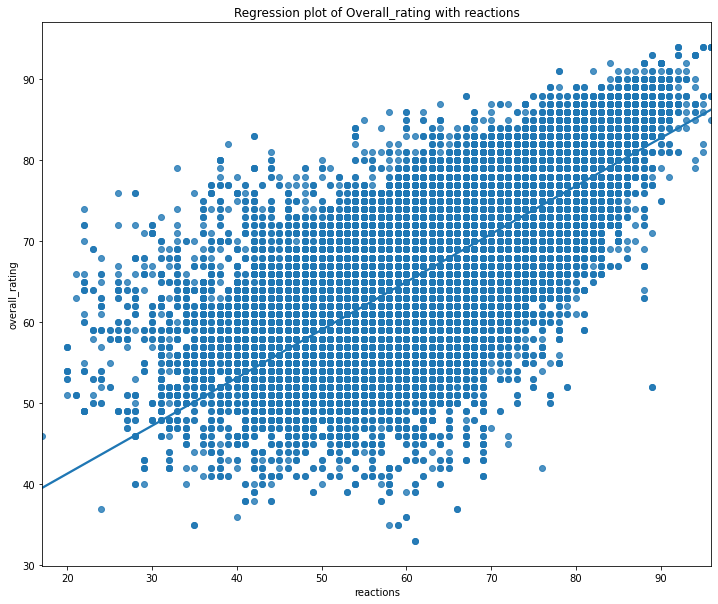

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Regression Plot of Target feature with 'reactions' and 'potential'

plt.figure(figsize = (12,10))
sns.regplot(x = 'reactions',y='overall_rating', data = df)
plt.title('Regression plot of Overall_rating with reactions')

Text(0.5, 1.0, 'Regression plot of Overall_rating with potential')

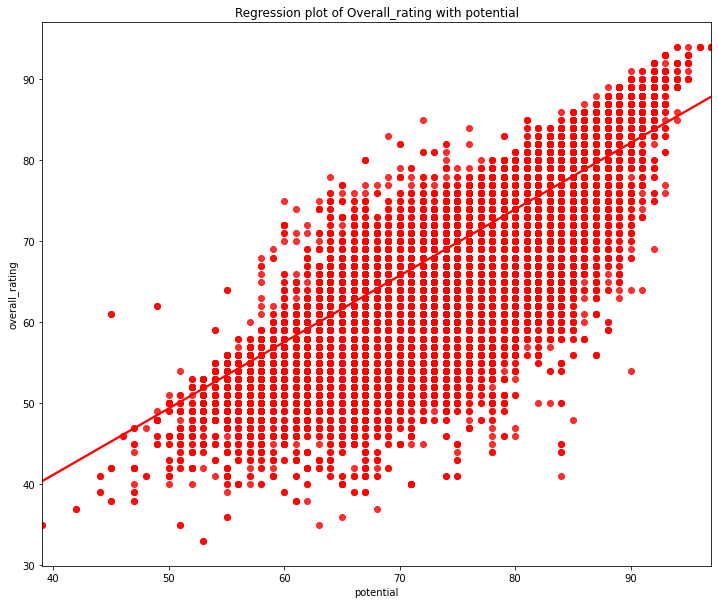

In [14]:
plt.figure(figsize = (12,10))
sns.regplot(x = 'potential',y='overall_rating', data = df, color = 'red')
plt.title('Regression plot of Overall_rating with potential')

Distribution Plots of Numerical Features and Target

array([[<AxesSubplot:title={'center':'overall_rating'}>,
        <AxesSubplot:title={'center':'potential'}>,
        <AxesSubplot:title={'center':'crossing'}>,
        <AxesSubplot:title={'center':'finishing'}>,
        <AxesSubplot:title={'center':'heading_accuracy'}>,
        <AxesSubplot:title={'center':'short_passing'}>],
       [<AxesSubplot:title={'center':'volleys'}>,
        <AxesSubplot:title={'center':'dribbling'}>,
        <AxesSubplot:title={'center':'curve'}>,
        <AxesSubplot:title={'center':'free_kick_accuracy'}>,
        <AxesSubplot:title={'center':'long_passing'}>,
        <AxesSubplot:title={'center':'ball_control'}>],
       [<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'sprint_speed'}>,
        <AxesSubplot:title={'center':'agility'}>,
        <AxesSubplot:title={'center':'reactions'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'shot_power'}>],
       [<AxesSubplot:title={'cente

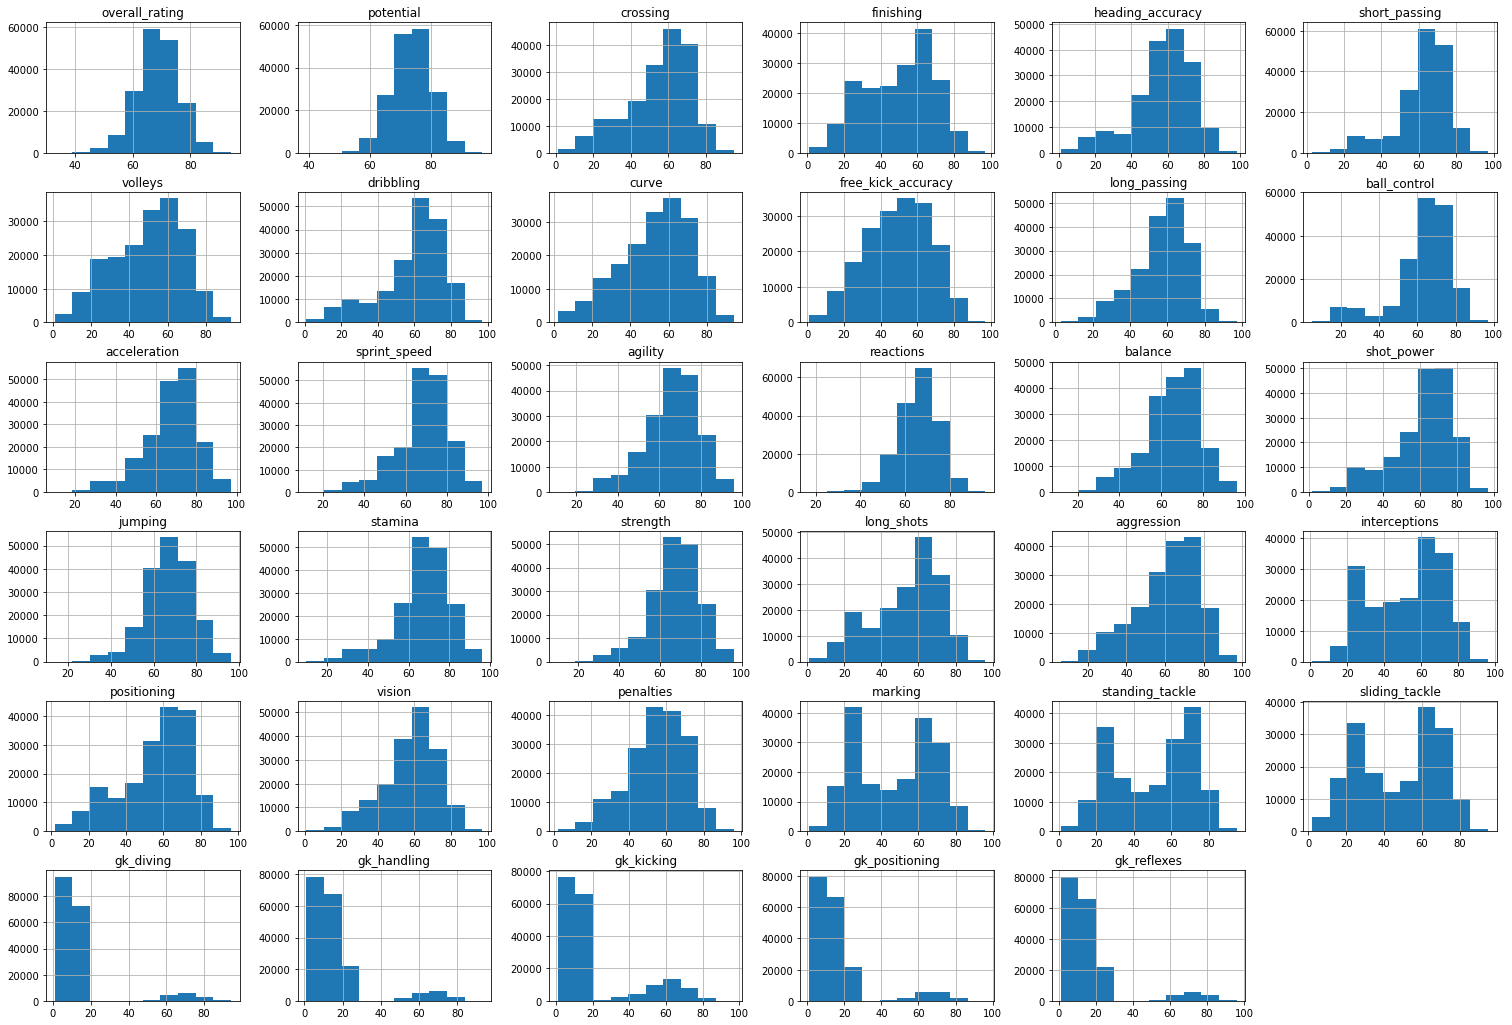

In [16]:

df.hist(figsize=(26,18))

In [13]:
df.isnull().sum()

overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle         2713
gk_diving               836
gk_handling             836
gk_kicking          

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0
gk_reflexes            0
dtype: int64

In [16]:
df.shape

(180354, 38)

Model Selection

In [17]:
# A. Linear Model Using 'reactions' and 'potential' as input features. Ridge regression will be used to reduce overfitting
#since number of features is very low.

target,data_1 = df['overall_rating'],df[['potential','reactions']]

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

regressor = make_pipeline(StandardScaler(),RidgeCV(alphas = [0.001,0.1,1,10,1000]))

In [19]:
#Cross Validation to assess the performance generalization and variability of the model using different metrics

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

scoring = ['r2','neg_mean_absolute_error','neg_mean_absolute_percentage_error']

cv = KFold(n_splits = 4)
cv_results = cross_validate(regressor, data_1, target, cv = cv, scoring = scoring, n_jobs = 2)

In [20]:
scores = {"R2": cv_results["test_r2"],
          "MAE": -cv_results["test_neg_mean_absolute_error"],
         "MAPE": -cv_results ["test_neg_mean_absolute_percentage_error"]}
scores = pd.DataFrame(scores)
scores

,R2,MAE,MAPE
0,0.752763,2.649164,0.040160
1,0.735685,2.645550,0.040108
2,0.743474,2.677938,0.040858
3,0.756768,2.617544,0.039709


In [22]:
print(f"The R squared value is: {scores['R2'].mean():.3f} +/- {scores['R2'].std():.3f}")
print(f"The mean absolute error is: {scores['MAE'].mean():.3f} +/- {scores['MAE'].std():.3f}")
print(f"The mean absolute percentage error is: {scores['MAPE'].mean():.3f} +/- {scores['MAPE'].std():.3f}")

The R squared value is: 0.747 +/- 0.009
The mean absolute error is: 2.648 +/- 0.025
The mean absolute percentage error is: 0.040 +/- 0.000


**A ridge model using all the numerical features**

In [26]:
import numpy as np
data_2 = df.select_dtypes(np.number)  #To select numerical features from df

In [27]:
data_2.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
regressor_2 = make_pipeline(StandardScaler(),RidgeCV(alphas = [0.001,0.1,1,10,1000]))

In [29]:
cv_results_2 = cross_validate(regressor_2, data_2, target, cv = cv, scoring = scoring, n_jobs = 2)

In [30]:
scores_2 = {"R2": cv_results_2["test_r2"],
          "MAE": -cv_results_2["test_neg_mean_absolute_error"],
         "MAPE": -cv_results_2["test_neg_mean_absolute_percentage_error"]}
scores_2 = pd.DataFrame(scores_2)
scores_2

,R2,MAE,MAPE
0,1.0,0.000143,0.000002
1,1.0,0.000499,0.000007
2,1.0,0.001099,0.000016
3,1.0,0.000101,0.000002


In [31]:
print(f"The R squared value is: {scores_2['R2'].mean():.3f} +/- {scores_2['R2'].std():.3f}")
print(f"The mean absolute error is: {scores_2['MAE'].mean():.3f} +/- {scores_2['MAE'].std():.3f}")
print(f"The mean absolute percentage error is: {scores_2['MAPE'].mean():.3f} +/- {scores_2['MAPE'].std():.3f}")

The R squared value is: 1.000 +/- 0.000
The mean absolute error is: 0.000 +/- 0.000
The mean absolute percentage error is: 0.000 +/- 0.000


It can be seen from the performance evaluation metrics used that using all the numeric features gives a very good model with R-squared value of 1 and mean absolute error of 0.